In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIGURATION ===
KNN_DIRS = {
    'vitb14_long': "/work/dlclarge2/sunagadb-runs/dinov2/outputs_b14_long/eval",
    'vitb14_reg': "/work/dlclarge2/sunagadb-runs/dinov2/outputs_b14/eval"
}
SPAIR_LOG_FILE = "spair_correspondence.log"
TARGET_K = 10  # for k-NN accuracy

# === STEP 1: Load KNN Accuracy from Logs ===
knn_records = []

for model_type, base_dir in KNN_DIRS.items():
    for entry in os.listdir(base_dir):
        match = re.match(r'training_(\d+)', entry)
        if match:
            iteration = int(match.group(1))
            log_path = os.path.join(base_dir, entry, "knn", "logs", "log.txt")

            if os.path.exists(log_path):
                with open(log_path, 'r') as f:
                    lines = f.readlines()
                    for line in lines:
                        if f"('full', {TARGET_K}) classifier result" in line:
                            top1 = float(re.search(r'Top1: ([0-9.]+)', line).group(1))
                            top5 = float(re.search(r'Top5: ([0-9.]+)', line).group(1))
                            knn_records.append({
                                'step': iteration,
                                'knn_top1': top1,
                                'knn_top5': top5,
                                'model_type': model_type
                            })
                            break

# Create KNN DataFrame
df_knn = pd.DataFrame(knn_records)

# Step 2: Equalize the number of checkpoints across models
# Find common steps between the two model types
steps_long = set(df_knn[df_knn['model_type'] == 'vitb14_long']['step'])
steps_reg = set(df_knn[df_knn['model_type'] == 'vitb14_reg']['step'])

# Use only the intersection of steps
common_steps = sorted(steps_long & steps_reg)

# Filter df_knn to only use the common steps
df_knn = df_knn[df_knn['step'].isin(common_steps)]


In [ ]:
print(f"Common steps: {common_steps}")

Common steps: [12499, 24999, 37499, 49999, 62499, 74999, 87499, 99999, 112499, 124999]


In [2]:
# Define evaluation tasks and logs
eval_tasks = {
    "spair": {
        "file": "spair_correspondence.log",
        "columns": [
            'timestamp', 'model', 'patch_size', 'layer', 'output_type', 'dataset', 
            'split', 'eval_class', 'num_instances',
            'sp/recall_vp0', 'sp/recall_vp1', 'sp/recall_vp2', 'sp/recall_all'
        ],
        "metrics": ['sp/recall_vp0', 'sp/recall_vp1', 'sp/recall_vp2', 'sp/recall_all']
    },
    "scannet": {
        "file": "scannet_correspondence.log",
        "columns": [
            'timestamp', 'model', 'patch_size', 'layer', 'output_type', 'dataset',
            'num_corr', 'scale_factor',
            'sc/recall_5px', 'sc/recall_10px', 'sc/recall_20px',
            'sc/bin_0_15', 'sc/bin_15_30', 'sc/bin_30_60', 'sc/bin_60_180'
        ],
        # "metrics": ['recall_5px', 'recall_10px', 'recall_20px', 'bin_0_15', 'bi÷n_15_30', 'bin_30_60', 'bin_60_180']
        "metrics": ['sc/bin_0_15', 'sc/bin_15_30', 'sc/bin_30_60', 'sc/bin_60_180']
    },
    "navi": {
        "file": "navi_correspondence.log",
        "columns": [
            'timestamp', 'model', 'patch_size', 'layer', 'output_type', 'num_corr',
            'scale_factor', 'dataset',
            'nv/recall_1cm', 'nv/recall_2cm', 'nv/recall_5cm',
            'nv/recall_5px', 'nv/recall_25px', 'nv/recall_50px',
            'nv/bin_0_30', 'nv/bin_30_60', 'nv/bin_60_90', 'nv/bin_90_120'
        ],
        # "metrics": ['recall_1cm', 'recall_2cm', 'recall_5cm', 'recall_5px', 'recall_25px', 'recall_50px', 'bin_0_30', 'bin_30_60', 'bin_60_90', 'bin_90_120']
        "metrics": ['nv/bin_0_30', 'nv/bin_30_60', 'nv/bin_60_90', 'nv/bin_90_120']
    },
    "depth": {
        "file": "depth_results_NYUv2.log",
        "columns": [
            'timestamp', 'model', 'patch_size', 'layer', 'output_type', 'probe',
            'epochs', 'warmup', 'probe_lr', 'model_lr', 'batch_size',
            'train_dset', 'test_dset',
            'SA_d1', 'SA_d2', 'SA_d3', 'SA_rmse',
            'SI_d1', 'SI_d2', 'SI_d3', 'SI_rmse'
        ],
        # "metrics": ['SA_d1', 'SA_d2', 'SA_d3', 'SA_rmse', 'SI_d1', 'SI_d2', 'SI_d3', 'SI_rmse']
        # "metrics": ['SI_d1', 'SI_d2', 'SI_d3', 'SI_rmse']
        "metrics": ['SI_d1', 'SI_d2', 'SI_d3']
    },
    "snorm": {
        "file": "snorm_results_NYUv2.log",
        "columns": [
            'timestamp', 'model', 'patch_size', 'layer', 'output_type', 'probe',
            'epochs', 'warmup', 'probe_lr', 'model_lr', 'batch_size',
            'train_dset', 'test_dset',
            'd1', 'd2', 'd3', 'rmse',
        ],
        # "metrics": ['d1', 'd2', 'd3', 'rmse']
        "metrics": ['d1', 'd2', 'd3']
    },
}


=== Task: SPAIR ===

>>> Correlation Matrix for vitb14_long <<<
               knn_top1  knn_top5
sp/recall_vp0  0.937937  0.902072
sp/recall_vp1  0.924981  0.886196
sp/recall_vp2  0.919177  0.879020
sp/recall_all  0.932662  0.895415


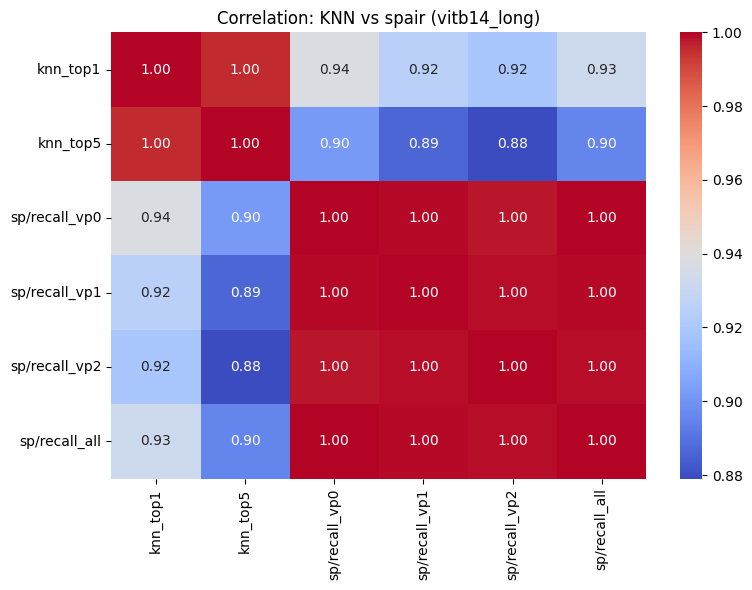


>>> Correlation Matrix for vitb14_reg <<<
               knn_top1  knn_top5
sp/recall_vp0  0.966220  0.939273
sp/recall_vp1  0.974131  0.949939
sp/recall_vp2  0.953959  0.922368
sp/recall_all  0.961036  0.932025


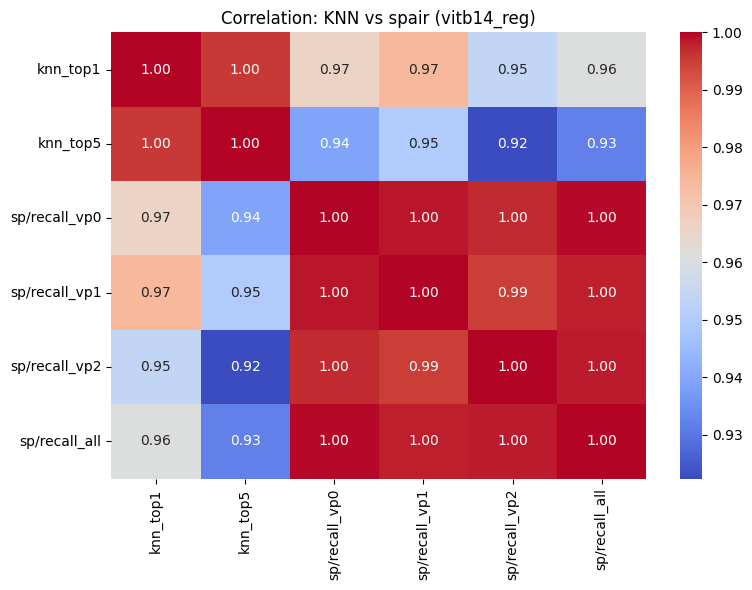


=== Task: SCANNET ===

>>> Correlation Matrix for vitb14_long <<<
               knn_top1  knn_top5
sc/bin_0_15    0.964520  0.945145
sc/bin_15_30   0.943772  0.917158
sc/bin_30_60   0.937708  0.912602
sc/bin_60_180  0.934919  0.908549


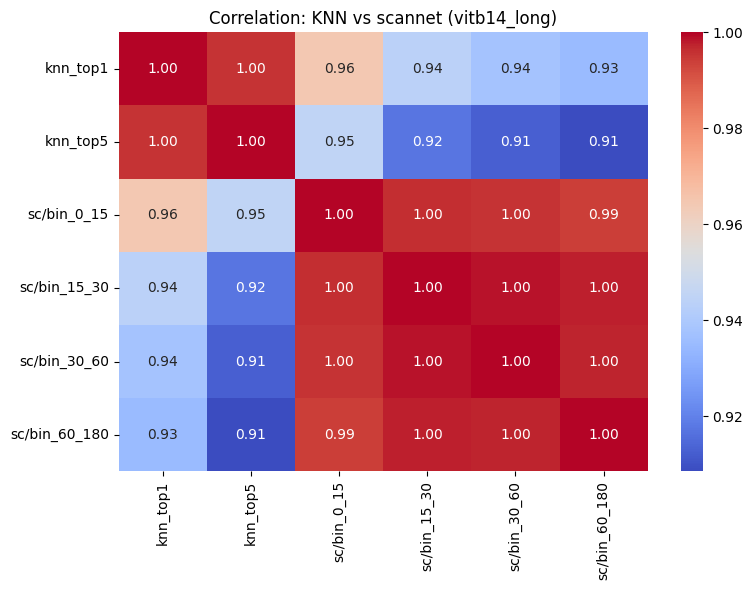


>>> Correlation Matrix for vitb14_reg <<<
               knn_top1  knn_top5
sc/bin_0_15    0.918130  0.880656
sc/bin_15_30   0.890068  0.846479
sc/bin_30_60   0.826845  0.774925
sc/bin_60_180  0.757072  0.703382


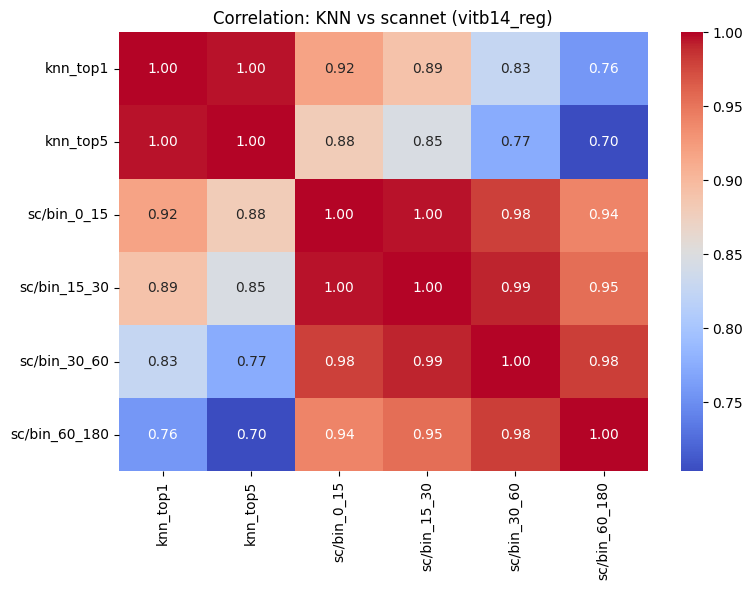


=== Task: NAVI ===

>>> Correlation Matrix for vitb14_long <<<
               knn_top1  knn_top5
nv/bin_0_30    0.995187  0.993651
nv/bin_30_60   0.992485  0.980978
nv/bin_60_90   0.977181  0.955385
nv/bin_90_120  0.929648  0.893261


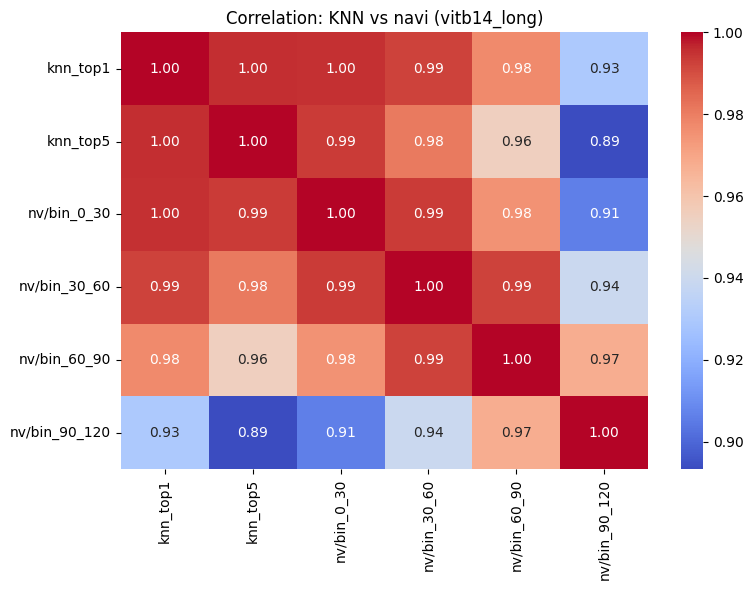


>>> Correlation Matrix for vitb14_reg <<<
               knn_top1  knn_top5
nv/bin_0_30    0.984766  0.965035
nv/bin_30_60   0.920898  0.884304
nv/bin_60_90   0.858641  0.812941
nv/bin_90_120  0.857577  0.807967


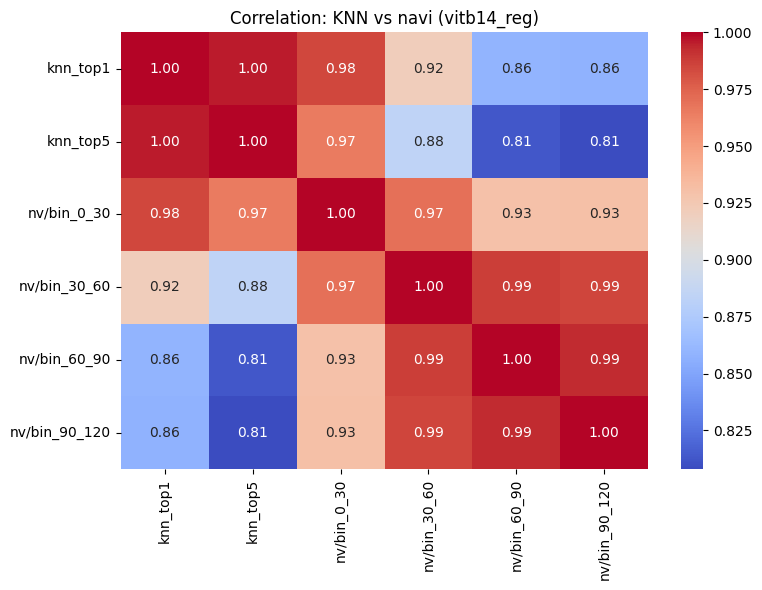


=== Task: DEPTH ===

>>> Correlation Matrix for vitb14_long <<<
       knn_top1  knn_top5
SI_d1  0.985802  0.966719
SI_d2  0.996124  0.988372
SI_d3  0.997926  0.996905


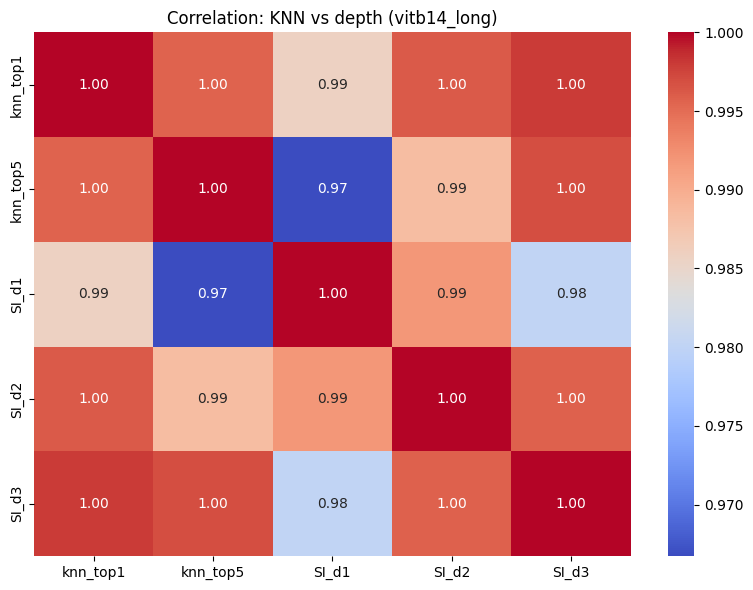


>>> Correlation Matrix for vitb14_reg <<<
       knn_top1  knn_top5
SI_d1  0.978494  0.965420
SI_d2  0.988004  0.979080
SI_d3  0.987796  0.975117


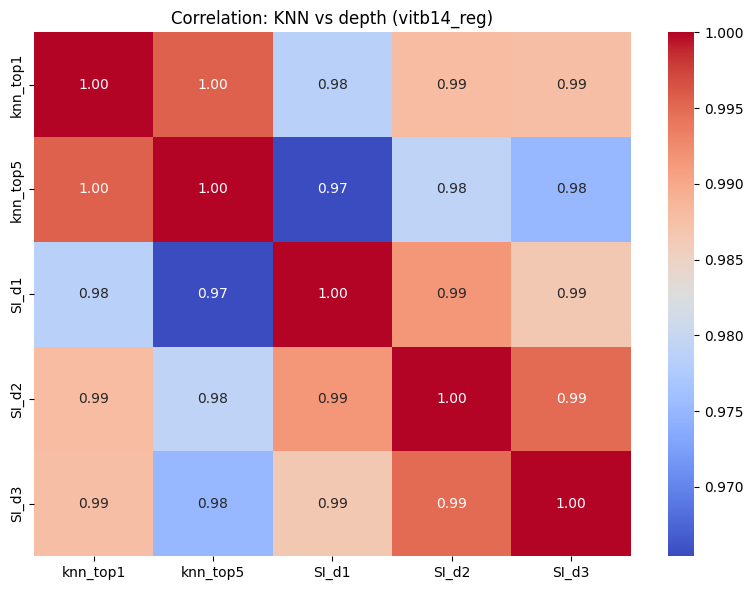


=== Task: SNORM ===

>>> Correlation Matrix for vitb14_long <<<
    knn_top1  knn_top5
d1  0.998521  0.996382
d2  0.999088  0.996794
d3  0.999216  0.994838


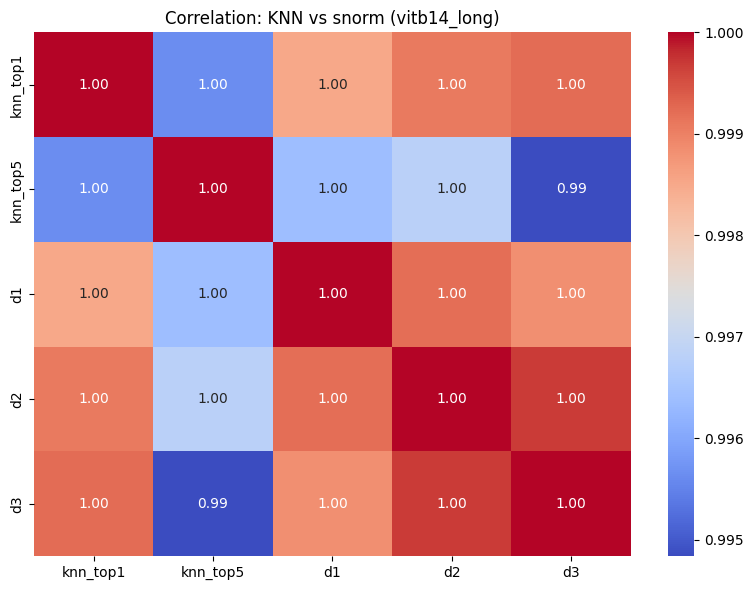


>>> Correlation Matrix for vitb14_reg <<<
    knn_top1  knn_top5
d1  0.967564  0.986286
d2  0.947370  0.972534
d3  0.941358  0.968108


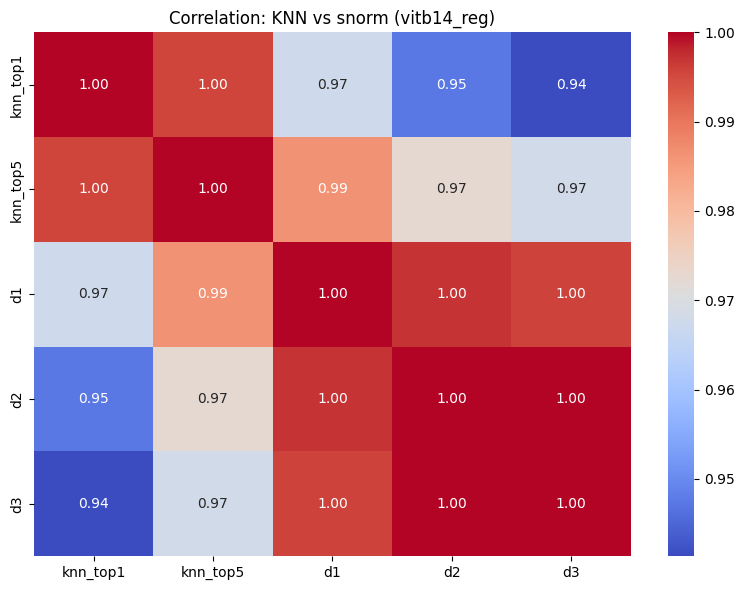

In [3]:
# === STEP 3: Load, Merge, Correlate, and Visualize ===
for task, info in eval_tasks.items():
    print(f"\n=== Task: {task.upper()} ===")
    df_task = pd.read_csv(info["file"], header=None, names=info["columns"])
    df_task['step'] = df_task['model'].str.extract(r'-(\d+)-')[0].astype(float)

    # Filter only our two models
    df_task = df_task[df_task['model'].str.contains('dinov2_vitb14_reg-outputs_b14|dinov2_vitb14-outputs_b14_long')].copy()
    df_task['model_type'] = df_task['model'].apply(lambda x: 'vitb14_reg' if 'reg' in x else 'vitb14_long')

    # Merge and correlate
    df_merged = pd.merge(df_knn, df_task, on=['step', 'model_type'])

    for model in df_merged['model_type'].unique():
        subset = df_merged[df_merged['model_type'] == model]
        columns_to_corr = ['knn_top1', 'knn_top5'] + info['metrics']
        corr_matrix = subset[columns_to_corr].corr()

        print(f"\n>>> Correlation Matrix for {model} <<<")
        print(corr_matrix[['knn_top1', 'knn_top5']].loc[info['metrics']])

        # Optional: plot
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f"Correlation: KNN vs {task} ({model})")
        plt.tight_layout()
        plt.show()


=== Task: SPAIR ===

=== Task: SCANNET ===

=== Task: NAVI ===

=== Task: DEPTH ===

=== Task: SNORM ===


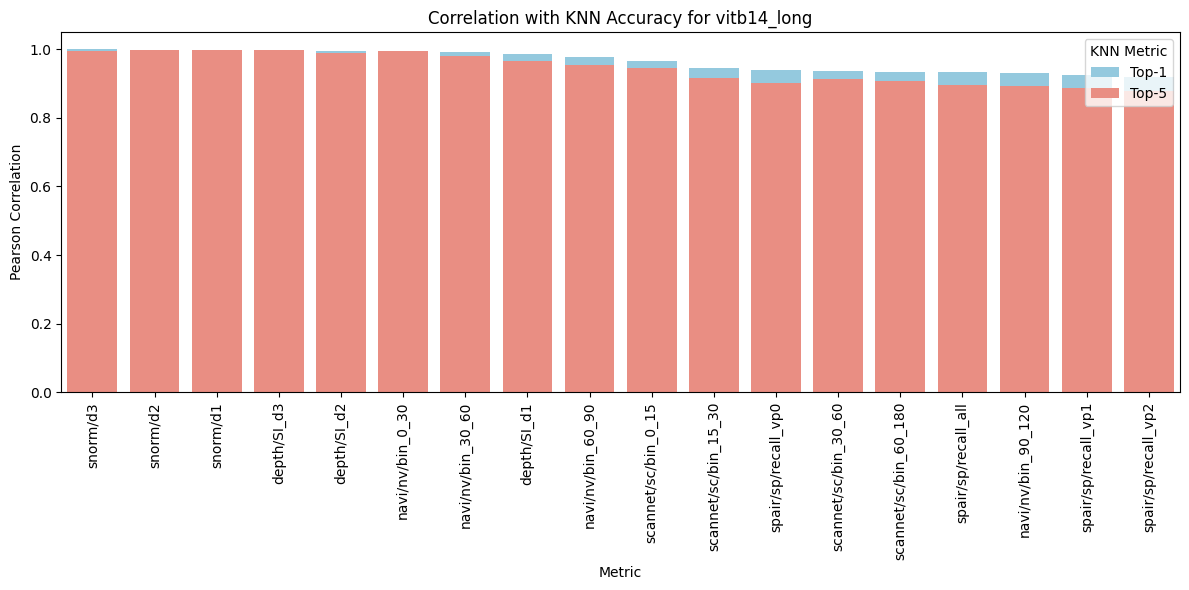

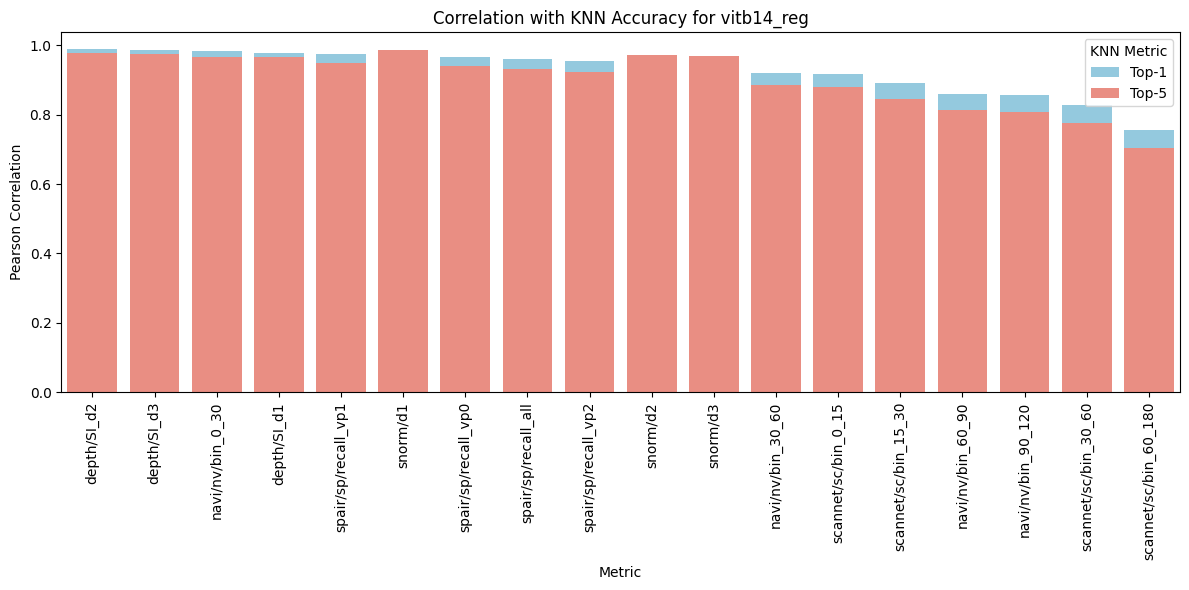

In [4]:
# Store correlations
model_correlation_summary = {
    'vitb14_long': [],
    'vitb14_reg': []
}

# === STEP 3: Load, Merge, Correlate, and Store ===
for task, info in eval_tasks.items():
    print(f"\n=== Task: {task.upper()} ===")
    df_task = pd.read_csv(info["file"], header=None, names=info["columns"])
    df_task['step'] = df_task['model'].str.extract(r'-(\d+)-')[0].astype(float)

    # Filter models of interest
    df_task = df_task[df_task['model'].str.contains('dinov2_vitb14_reg-outputs_b14|dinov2_vitb14-outputs_b14_long')].copy()
    df_task['model_type'] = df_task['model'].apply(lambda x: 'vitb14_reg' if 'reg' in x else 'vitb14_long')

    df_merged = pd.merge(df_knn, df_task, on=['step', 'model_type'])

    for model in df_merged['model_type'].unique():
        subset = df_merged[df_merged['model_type'] == model]

        present_metrics = [m for m in info['metrics'] if m in subset.columns]
        if not present_metrics:
            print(f"[WARNING] No valid metrics found for task '{task}' and model '{model}'")
            continue

        corr_matrix = subset[['knn_top1', 'knn_top5'] + present_metrics].corr()
        metric_corr = corr_matrix.loc[present_metrics, ['knn_top1', 'knn_top5']]

        for metric in present_metrics:
            model_correlation_summary[model].append({
                'task': task,
                'metric': metric,
                'knn_top1_corr': metric_corr.loc[metric, 'knn_top1'],
                'knn_top5_corr': metric_corr.loc[metric, 'knn_top5']
            })

# === STEP 4: Plot Summary Correlation for Each Model ===
for model_type, records in model_correlation_summary.items():
    df_plot = pd.DataFrame(records)
    df_plot['label'] = df_plot['task'] + '/' + df_plot['metric']

    plt.figure(figsize=(12, 6))
    df_plot.sort_values(by='knn_top1_corr', ascending=False, inplace=True)
    sns.barplot(data=df_plot, x='label', y='knn_top1_corr', color='skyblue', label='Top-1')
    sns.barplot(data=df_plot, x='label', y='knn_top5_corr', color='salmon', label='Top-5')

    plt.title(f"Correlation with KNN Accuracy for {model_type}")
    plt.xlabel("Metric")
    plt.ylabel("Pearson Correlation")
    plt.xticks(rotation=90)
    plt.legend(title="KNN Metric")
    plt.tight_layout()
    plt.show()



=== Task: SPAIR ===

=== Task: SCANNET ===

=== Task: NAVI ===

=== Task: DEPTH ===

=== Task: SNORM ===


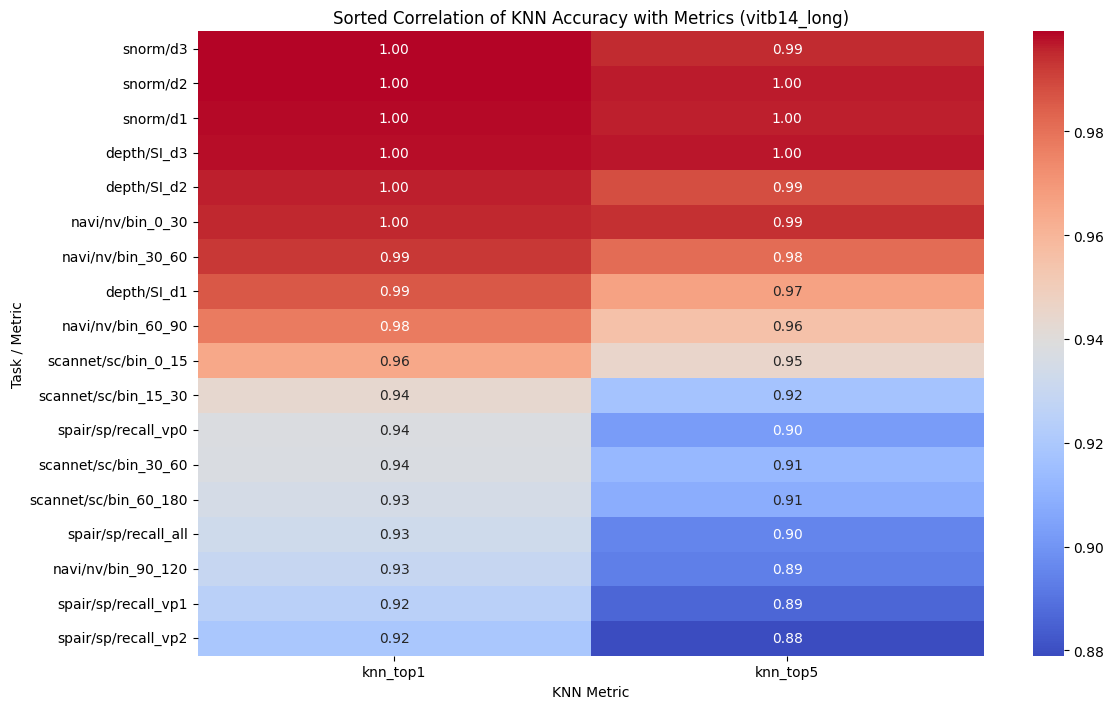

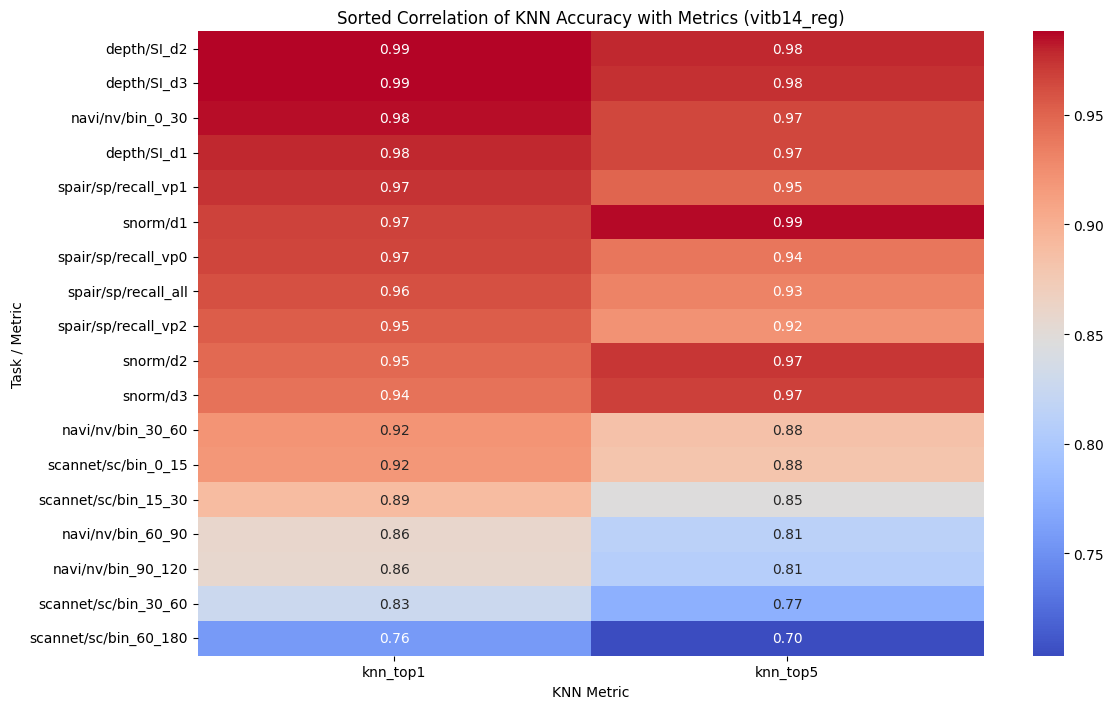

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store correlation values in a structured form
correlation_maps = {
    'vitb14_long': {},
    'vitb14_reg': {}
}

# === STEP 3: Load, Merge, Correlate ===
for task, info in eval_tasks.items():
    print(f"\n=== Task: {task.upper()} ===")
    df_task = pd.read_csv(info["file"], header=None, names=info["columns"])
    df_task['step'] = df_task['model'].str.extract(r'-(\d+)-')[0].astype(float)

    df_task = df_task[df_task['model'].str.contains('dinov2_vitb14_reg-outputs_b14|dinov2_vitb14-outputs_b14_long')].copy()
    df_task['model_type'] = df_task['model'].apply(lambda x: 'vitb14_reg' if 'reg' in x else 'vitb14_long')

    df_merged = pd.merge(df_knn, df_task, on=['step', 'model_type'])

    for model in df_merged['model_type'].unique():
        subset = df_merged[df_merged['model_type'] == model]

        present_metrics = [m for m in info['metrics'] if m in subset.columns]
        if not present_metrics:
            continue

        corr_matrix = subset[['knn_top1', 'knn_top5'] + present_metrics].corr()

        for metric in present_metrics:
            correlation_maps[model][f"{task}/{metric}"] = {
                'knn_top1': corr_matrix.loc[metric, 'knn_top1'],
                'knn_top5': corr_matrix.loc[metric, 'knn_top5']
            }

# === STEP 4: Plot Sorted Correlation Heatmaps ===
for model_type in ['vitb14_long', 'vitb14_reg']:
    corr_data = correlation_maps[model_type]
    df_corr = pd.DataFrame(corr_data).T  # Rows = metric, Columns = knn_top1, knn_top5

    # Sort rows by knn_top1 correlation descending
    df_corr_sorted = df_corr.sort_values(by='knn_top1', ascending=False)

    # Plot heatmap
    plt.figure(figsize=(12, max(6, 0.4 * len(df_corr_sorted))))
    sns.heatmap(df_corr_sorted, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Sorted Correlation of KNN Accuracy with Metrics ({model_type})")
    plt.xlabel("KNN Metric")
    plt.ylabel("Task / Metric")
    plt.tight_layout()
    plt.show()



>>> Sorted Correlations with knn_top1 for vitb14_long <<<
knn_top1         1.000000
d3               0.999216
d2               0.999088
d1               0.998521
SI_d3            0.997926
SI_d2            0.996124
knn_top5         0.995644
nv/bin_0_30      0.995187
nv/bin_30_60     0.992485
SI_d1            0.985802
nv/bin_60_90     0.977181
sc/bin_0_15      0.964520
sc/bin_15_30     0.943772
sp/recall_vp0    0.937937
sc/bin_30_60     0.937708
sc/bin_60_180    0.934919
sp/recall_all    0.932662
nv/bin_90_120    0.929648
sp/recall_vp1    0.924981
sp/recall_vp2    0.919177
Name: knn_top1, dtype: float64


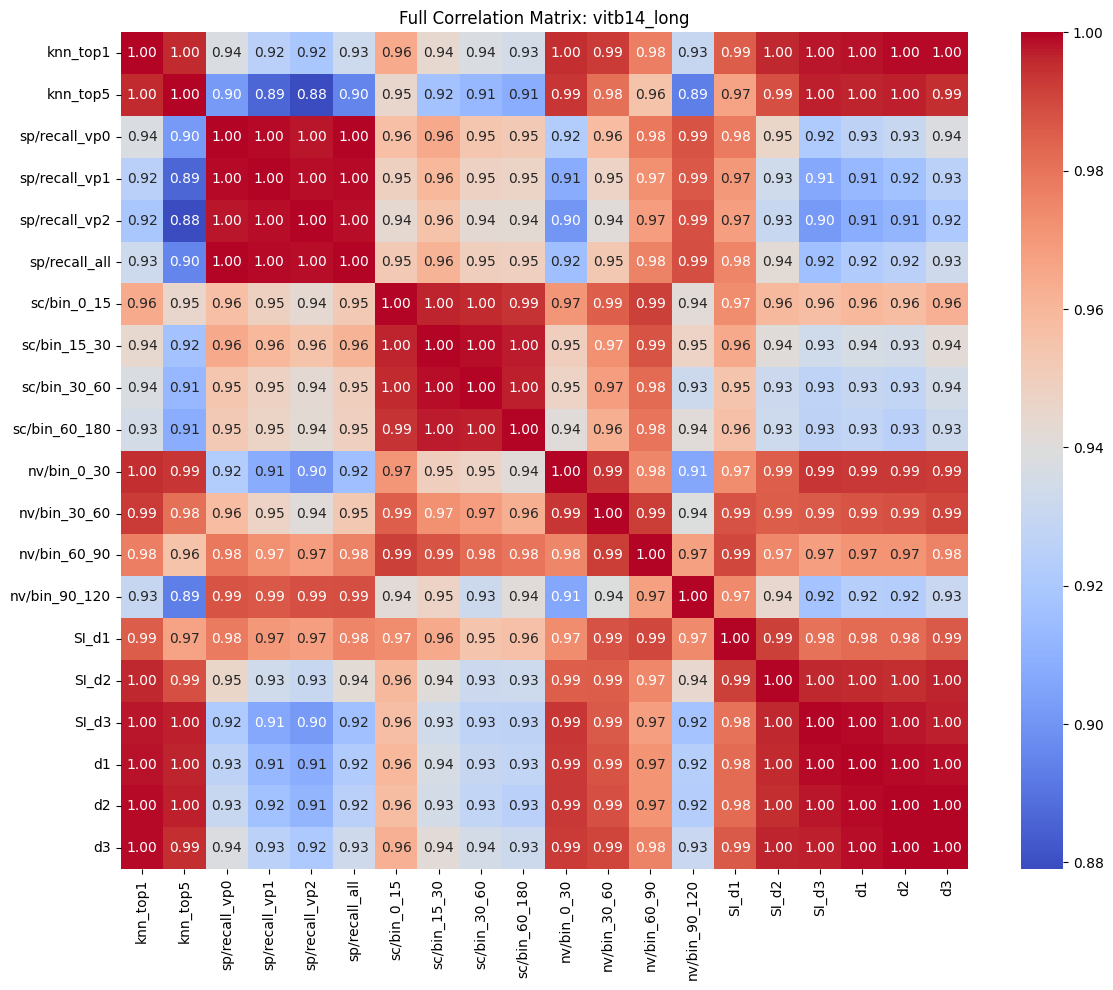


>>> Sorted Correlations with knn_top1 for vitb14_reg <<<
knn_top1         1.000000
knn_top5         0.995053
SI_d2            0.988044
nv/bin_0_30      0.984901
SI_d3            0.983534
sp/recall_vp1    0.978187
sp/recall_vp0    0.972008
SI_d1            0.971150
sp/recall_all    0.966969
d1               0.964265
sp/recall_vp2    0.962866
d2               0.937666
nv/bin_30_60     0.930768
sc/bin_0_15      0.930347
d3               0.929558
sc/bin_15_30     0.907750
nv/bin_90_120    0.885704
nv/bin_60_90     0.884559
sc/bin_30_60     0.867091
sc/bin_60_180    0.825706
Name: knn_top1, dtype: float64


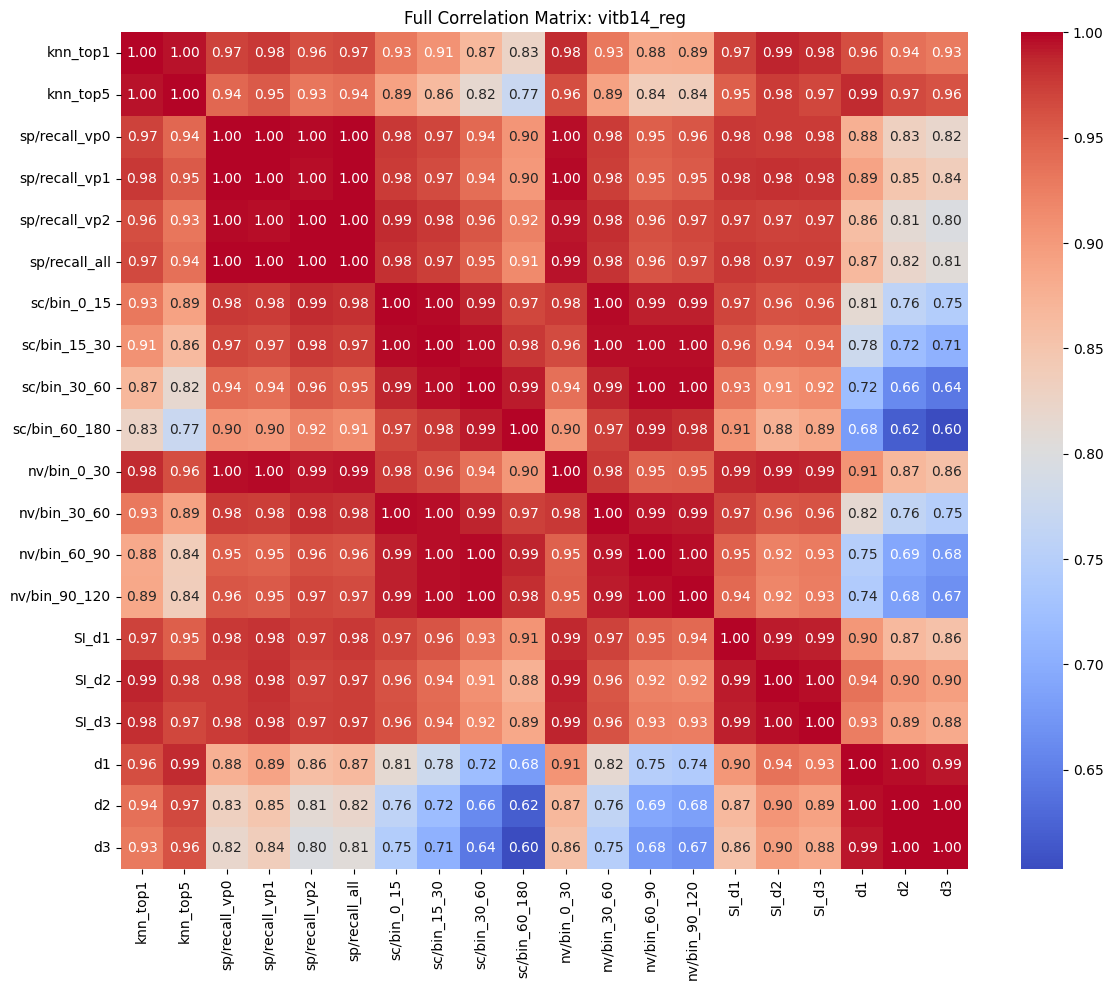

In [6]:
all_metrics_df = []

for task, info in eval_tasks.items():
    df_task = pd.read_csv(info["file"], header=None, names=info["columns"])
    df_task['step'] = df_task['model'].str.extract(r'-(\d+)-')[0].astype(float)
    df_task = df_task[df_task['model'].str.contains('dinov2_vitb14_reg-outputs_b14|dinov2_vitb14-outputs_b14_long')].copy()
    df_task['model_type'] = df_task['model'].apply(lambda x: 'vitb14_reg' if 'reg' in x else 'vitb14_long')

    # Keep only required columns
    keep_cols = ['step', 'model_type'] + info['metrics']
    all_metrics_df.append(df_task[keep_cols])

# Merge all task dataframes on ['step', 'model_type']
from functools import reduce
df_all = reduce(lambda left, right: pd.merge(left, right, on=['step', 'model_type'], how='outer'), all_metrics_df)

# Merge with knn results
df_combined = pd.merge(df_knn, df_all, on=['step', 'model_type'])
# print(f"Combined DataFrame shape: {df_combined}")
# === STEP 3: Plot one correlation matrix per model ===
# === STEP 3: Plot one correlation matrix per model ===
for model in df_combined['model_type'].unique():
    subset = df_combined[df_combined['model_type'] == model]
    
    # Keep only numeric columns
    numeric_subset = subset.select_dtypes(include='number')
    # numeric_subset = numeric_subset.loc[:, ~numeric_subset.columns.str.contains('rmse', case=False)]
    numeric_subset = numeric_subset.loc[:, ~numeric_subset.columns.str.contains('step', case=False)]

    corr = numeric_subset.corr()

    # Optional: print top correlated with knn_top1
    if 'knn_top1' in corr.columns:
        print(f"\n>>> Sorted Correlations with knn_top1 for {model} <<<")
        print(corr['knn_top1'].sort_values(ascending=False))

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Full Correlation Matrix: {model}")
    plt.tight_layout()
    plt.show()




>>> Sorted Correlations with knn_top1 for vitb14_long <<<
knn_top1         1.000000
d3               0.999216
d2               0.999088
d1               0.998521
SI_d3            0.997926
SI_d2            0.996124
knn_top5         0.995644
nv/bin_0_30      0.995187
nv/bin_30_60     0.992485
SI_d1            0.985802
nv/bin_60_90     0.977181
sc/bin_0_15      0.964520
sc/bin_15_30     0.943772
sp/recall_vp0    0.937937
sc/bin_30_60     0.937708
sc/bin_60_180    0.934919
sp/recall_all    0.932662
nv/bin_90_120    0.929648
sp/recall_vp1    0.924981
sp/recall_vp2    0.919177
Name: knn_top1, dtype: float64


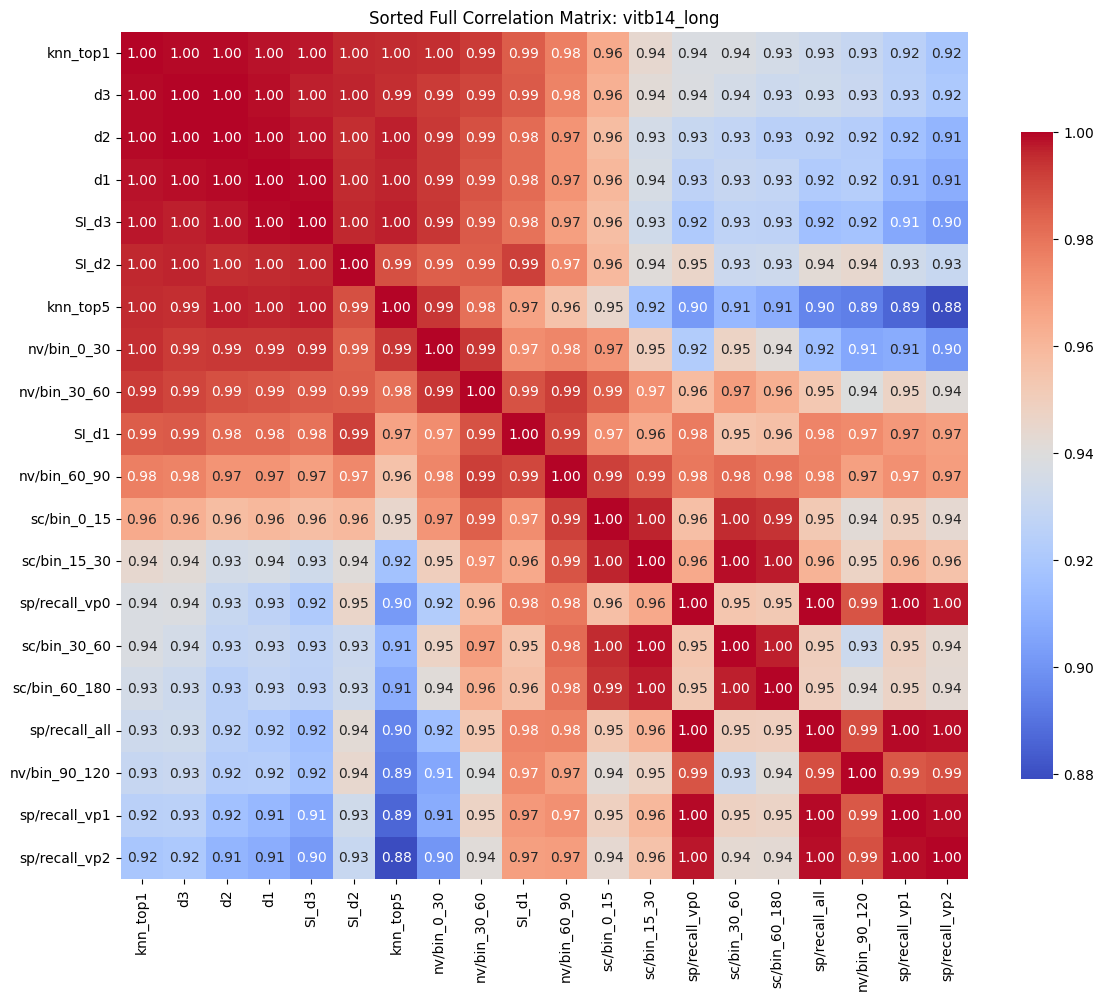


>>> Sorted Correlations with knn_top1 for vitb14_reg <<<
knn_top1         1.000000
knn_top5         0.995053
SI_d2            0.988044
nv/bin_0_30      0.984901
SI_d3            0.983534
sp/recall_vp1    0.978187
sp/recall_vp0    0.972008
SI_d1            0.971150
sp/recall_all    0.966969
d1               0.964265
sp/recall_vp2    0.962866
d2               0.937666
nv/bin_30_60     0.930768
sc/bin_0_15      0.930347
d3               0.929558
sc/bin_15_30     0.907750
nv/bin_90_120    0.885704
nv/bin_60_90     0.884559
sc/bin_30_60     0.867091
sc/bin_60_180    0.825706
Name: knn_top1, dtype: float64


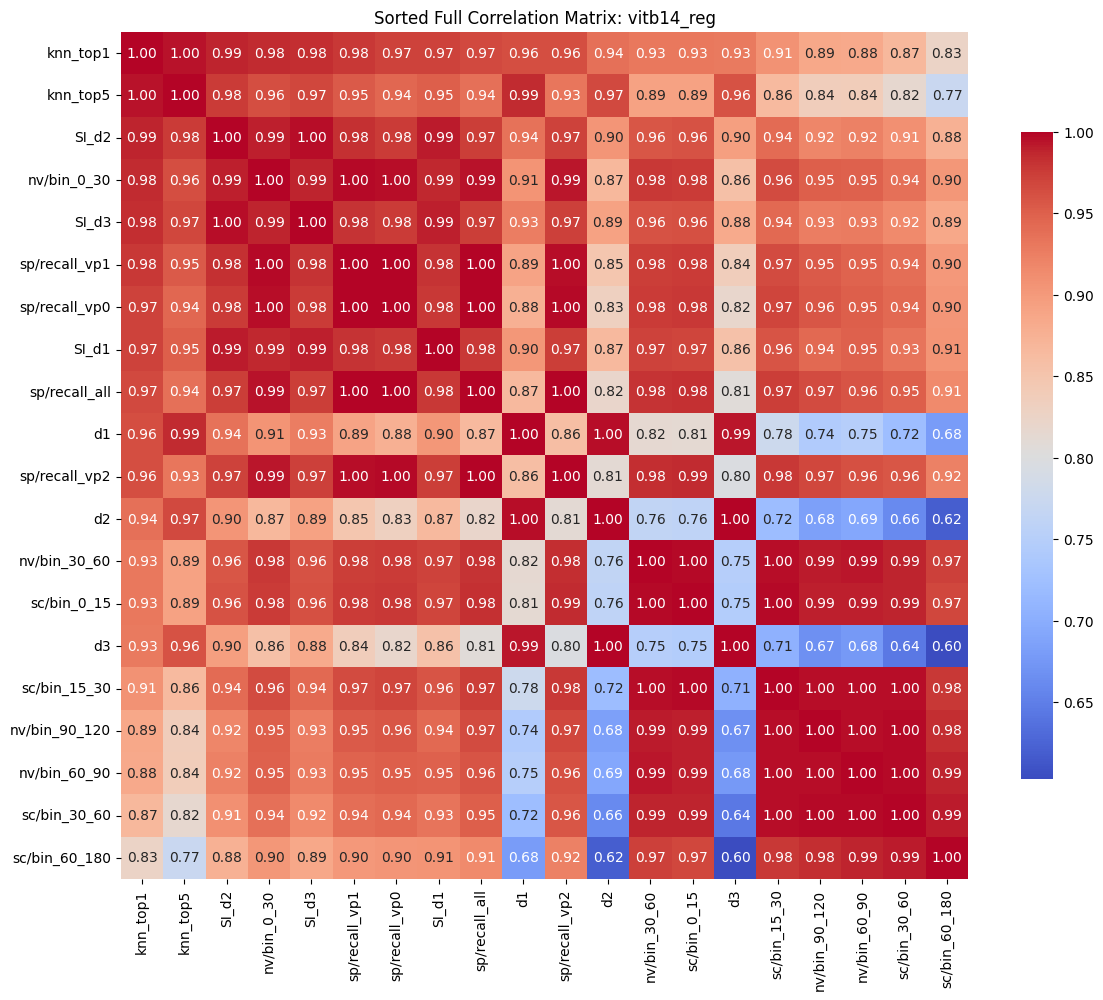

In [7]:
for model in df_combined['model_type'].unique():
    subset = df_combined[df_combined['model_type'] == model]
    
    # Keep only numeric columns and drop 'step'
    numeric_subset = subset.select_dtypes(include='number')
    numeric_subset = numeric_subset.loc[:, ~numeric_subset.columns.str.contains('step', case=False)]

    # Compute correlation matrix
    corr = numeric_subset.corr()

    if 'knn_top1' in corr.columns:
        print(f"\n>>> Sorted Correlations with knn_top1 for {model} <<<")
        print(corr['knn_top1'].sort_values(ascending=False))

        # Sort rows/columns by absolute correlation with knn_top1
        sort_order = corr['knn_top1'].abs().sort_values(ascending=False).index
        corr = corr.loc[sort_order, sort_order]

    # Plot sorted heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": 0.75})
    plt.title(f"Sorted Full Correlation Matrix: {model}")
    plt.tight_layout()
    plt.show()
